In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats.mstats as ms

In [2]:
def merge ( data_array ):
    data = pd.concat ( [ data_nonSOE, data_SOE ] ).drop ( "State owned", axis = 1 )
    data.dropna( inplace = True )
    return data.groupby ( by = "Country Code" ).mean()

In [3]:
def graph ( data, xlabel, ylabel, title, size = ( 20, 5 )  ):
    fig, ax = plt.subplots( figsize = size )
    size = 1 if len ( data.shape ) == 1 else data.shape[1]
    width = 2.0 if size == 1 else 0.6
    x = np.arange ( len ( data.index ) )
    if size == 1:
        _data = data.sort_values ( ascending = False )
        ax.bar ( x * 5 - width/2 , _data, width, label = "2015-2019", color = colors [ 4 ] )
    else:
        _data = data.sort_values ( by = "2019", ascending = False )
        i = 0
        for year in years:
            ax.bar ( x * 5 + i * width, _data[ year ], width, label = year, color = colors [ i ] )
            i += 1
    ax.set_xticks ( x * 5 - width/2, _data.index )
    ax.set_ylabel ( ylabel, weight = "bold" )
    ax.set_xlabel ( xlabel, weight = "bold" )
    ax.set_title ( title, weight = "bold" )
    ax.legend()
    return fig, ax

In [6]:
def graph_vs ( data, cols, labels, xlabel, ylabel, title, colors = colors, size = ( 20, 5 ), separate = False, ylabel2 = "", sort = True ):
    fig, ax = plt.subplots( figsize = size )
    width = 1.5
    x = np.arange ( len ( data.index ) )
    if sort:
        _data = data.sort_values ( by = ( cols[ 0 ] ), ascending = True )
    else:
        _data = data
    i = 0
    for cat in cols:
        if separate and i == 1:
            ax2 = ax.twinx()
            ax2.bar ( x * 5 + i * width , _data[ cat ], width, label = labels[ i ], color = colors [ i ] )
            ax2.set_ylabel ( ylabel2 )
            ax2.legend()
        else:
            ax.bar ( x * 5 + i * width , _data[ cat ], width, label = labels [ i ], color = colors [ i ] )
        i += 1
    ax.set_xticks ( x * 5 + width / 2, _data.index )
    ax.set_ylabel ( ylabel, weight = "bold" )
    ax.set_xlabel ( xlabel, weight = "bold" )
    ax.set_title ( title, weight = "bold" )
    #ax.tick_params( axis='x', rotation = 90 )
    ax.legend()
    return fig, ax

In [5]:
years = [ "2015", "2016", "2017", "2018", "2019" ]
categories = [ "ESG", "ROE", "TA", "TD", "MC", "MtBV", "Corruption", "GDP" ]
labels = { "ESG": "ESG score",
          "ROE": "RoE",
          "TA": "Total assets",
          "TD": "Total debt to capital",
          "MC": "Market capitalization",
          "MtBV": "Market to book value",
          "Corruption": "Corruption",
          "GDP": "GDP" }
colors = [ "#D1EAF0", "#A1CAF1", "#4682B4", "#2D5DA1", "#00308F" ]

corr_data = pd.read_csv( "Data/Corruption.csv", delimiter = ";")
corruption = [ corr_data [ "2015" ], corr_data [ "2016" ], corr_data [ "2017" ], corr_data [ "2018" ], corr_data [ "2019" ], corr_data["Country Code"] ]
corruption = pd.DataFrame ( corruption ).transpose()
corruption.set_index ( "Country Code", inplace = True )
corruption.dropna( inplace = True )
corruption.columns = [ "Corruption 2015", "Corruption 2016", "Corruption 2017", "Corruption 2018", "Corruption 2019" ]
for col in corruption.columns:
    corruption [ col ] = pd.to_numeric ( corruption [ col ] )

gdp_data = pd.read_csv( "Data/GDP.csv", delimiter = ";")
gdp = [ gdp_data [ "2015" ], gdp_data [ "2016" ], gdp_data [ "2017" ], gdp_data [ "2018" ], gdp_data [ "2019" ], gdp_data["Country Code"] ]
gdp = pd.DataFrame ( gdp ).transpose()
gdp.set_index ( "Country Code", inplace = True )
gdp.dropna( inplace = True )
gdp.columns = [ "GDP 2015", "GDP 2016", "GDP 2017", "GDP 2018", "GDP 2019" ]
for col in gdp.columns:
    gdp [ col ] = pd.to_numeric ( gdp [ col ] )

In [7]:
data_SOE = pd.DataFrame ( pd.read_csv( "Data/SOE.csv", delimiter = ";" ) )
data_SOE.dropna( inplace = True )
data_SOE = data_SOE.groupby ( "Country Code" ).mean()
data_SOE = data_SOE.join ( corruption )
data_SOE = data_SOE.join ( gdp )

data_SOE.columns = pd.MultiIndex.from_product( [ categories, years  ] ).insert ( -10, "State owned" )

for cat in categories:
    value = 0
    for y in years:
        value += data_SOE [ cat, y ]
    data_SOE [ cat, "Mean" ] = value / 5

data_SOE.sort_index ( axis = 1, inplace = True )

In [8]:
data_nonSOE = pd.DataFrame ( pd.read_csv( "Data/nonSOE.csv", delimiter = ";" ) )
data_nonSOE.dropna( inplace = True )
data_nonSOE = data_nonSOE.groupby ( "Country Code" ).mean()
data_nonSOE = data_nonSOE.join ( corruption )
data_nonSOE = data_nonSOE.join ( gdp )

data_nonSOE.columns = pd.MultiIndex.from_product( [ categories, years  ] ).insert ( -10, "State owned" )

for cat in categories:
    value = 0
    for y in years:
        value += data_nonSOE [ cat, y ]
    data_nonSOE [ cat, "Mean" ] = value / 5

data_nonSOE.sort_index ( axis = 1, inplace = True )

In [9]:
data = merge ( [ data_nonSOE, data_SOE ] )

# Means

## ESG (combined)

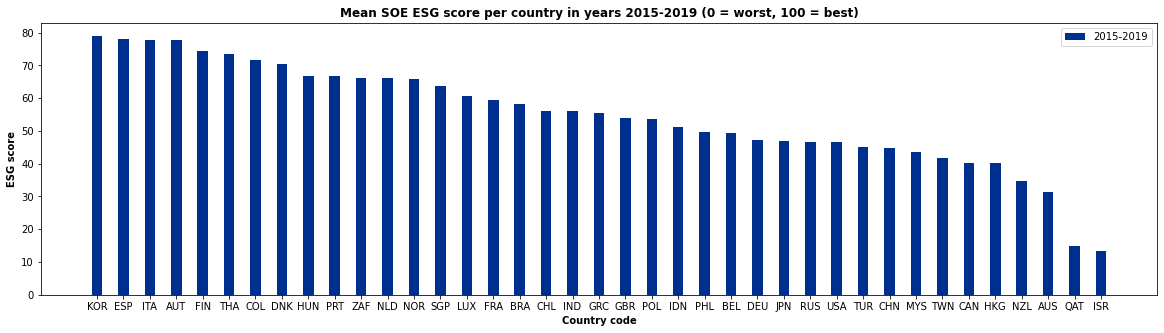

In [15]:
fig, ax = graph ( data["ESG", "Mean"], "Country code", "ESG score", "Mean SOE ESG score per country in years 2015-2019 (0 = worst, 100 = best)", size = (20, 5) )
#fig.savefig ( "mean_combined_esg_per_country.png", dpi = 300 )

## Mean corruption (combined)

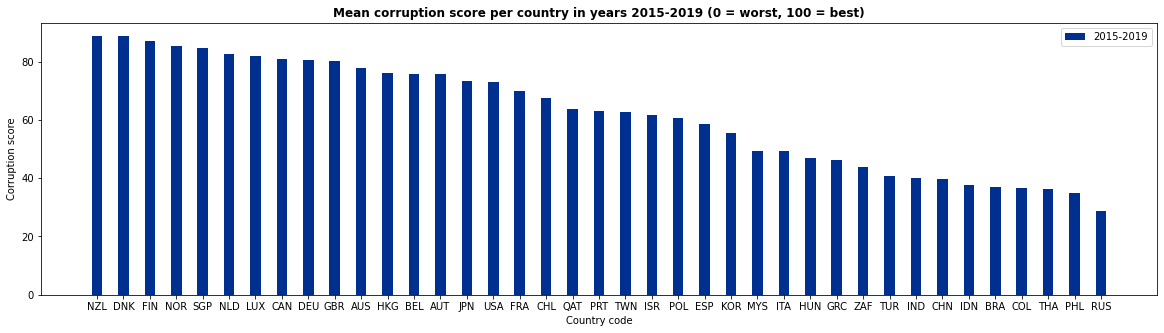

In [952]:
fig, ax = graph ( data["Corruption", "Mean"], "Country code", "Corruption score", "Mean corruption score per country in years 2015-2019 (0 = worst, 100 = best)", size = (20, 5) )
fig.savefig ( "mean_combined_corruption_per_country.png", dpi = 300 )

## Mean GDP (combined)

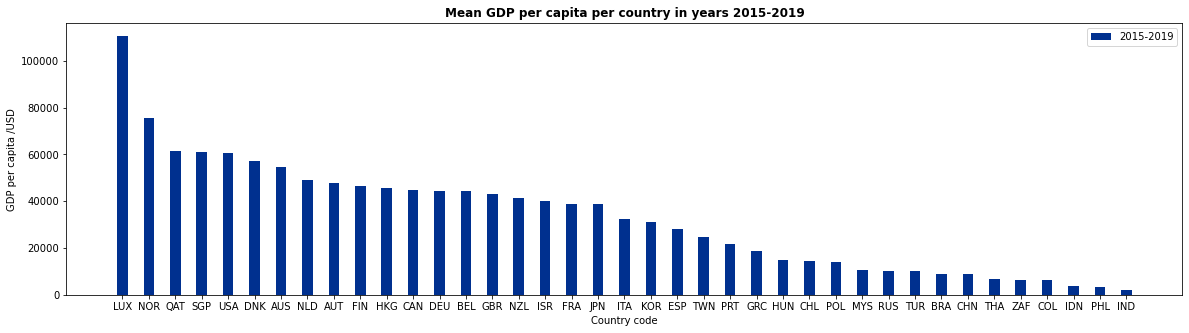

In [951]:
fig, ax = graph ( data["GDP", "Mean"], "Country code", "GDP per capita /USD", "Mean GDP per capita per country in years 2015-2019", size = (20, 5) )
fig.savefig ( "mean_combined_gdp_per_country.png", dpi = 300 )

In [936]:
from scipy import stats
x = pd.concat ( [ data_nonSOE, data_SOE] ).dropna()
stats.pearsonr ( data [ "ESG" , "Mean" ], data [ "GDP" , "Mean" ] )

(-0.08127243213756094, 0.6228268661529072)

# non-SOE

## ESG per year

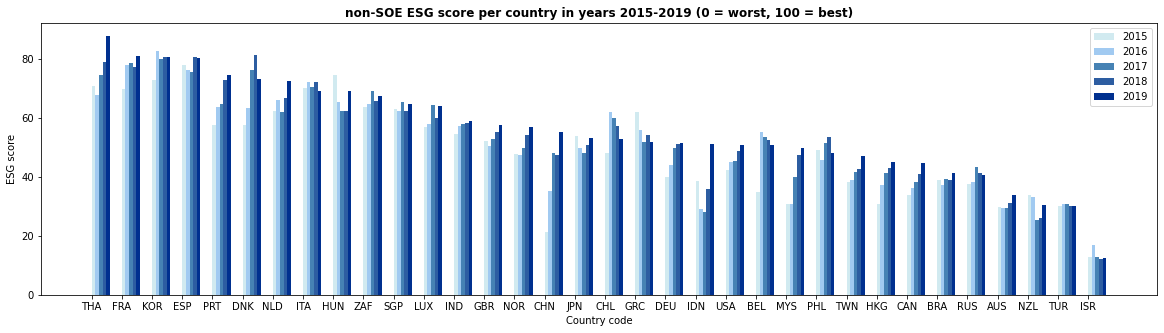

In [764]:
fig, ax = graph ( data_nonSOE["ESG"], "Country code", "ESG score", "non-SOE ESG score per country in years 2015-2019 (0 = worst, 100 = best)", size = (20, 5 ) )
fig.savefig ( "nonsoe_esg_per_country_per_year.png", dpi = 300 )

# ESG mean

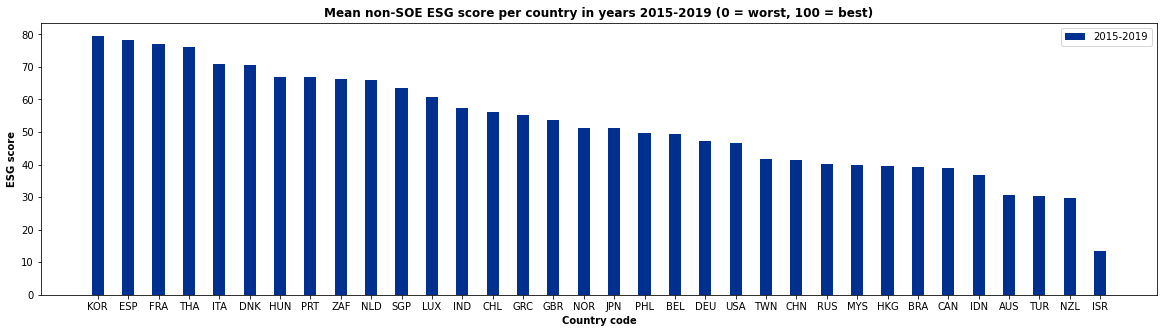

In [17]:
fig, ax = graph ( data_nonSOE["ESG", "Mean"], "Country code", "ESG score", "Mean non-SOE ESG score per country in years 2015-2019 (0 = worst, 100 = best)", size = (20, 5) )
#fig.savefig ( "mean_nonsoe_esg_per_country.png", dpi = 300 )

# ESG mean vs corruption

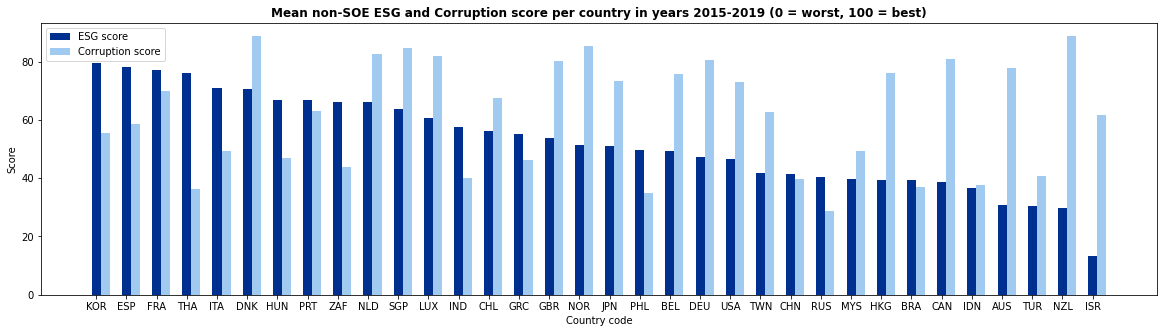

In [766]:
fig, ax = graph_vs ( data_nonSOE, [ ("ESG","Mean"), ("Corruption", "Mean") ], ["ESG score", "Corruption score"], "Country code", "Score", "Mean non-SOE ESG and Corruption score per country in years 2015-2019 (0 = worst, 100 = best)", colors = [ colors [ 4 ], colors [ 1 ] ] , size = (20, 5) )
fig.savefig ( "mean_nonsoe_esg_vs_corr_per_country.png", dpi = 300 )

# RoE per year

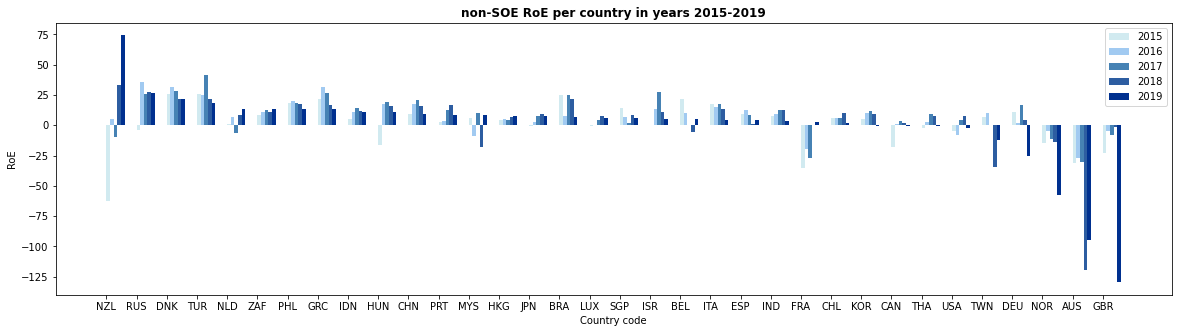

In [767]:
fig, ax = graph ( data_nonSOE["ROE"], "Country code", "RoE", "non-SOE RoE per country in years 2015-2019", size = (20, 5 ) )
fig.savefig ( "nonsoe_roe_per_country_per_year.png", dpi = 300 )

## RoE mean

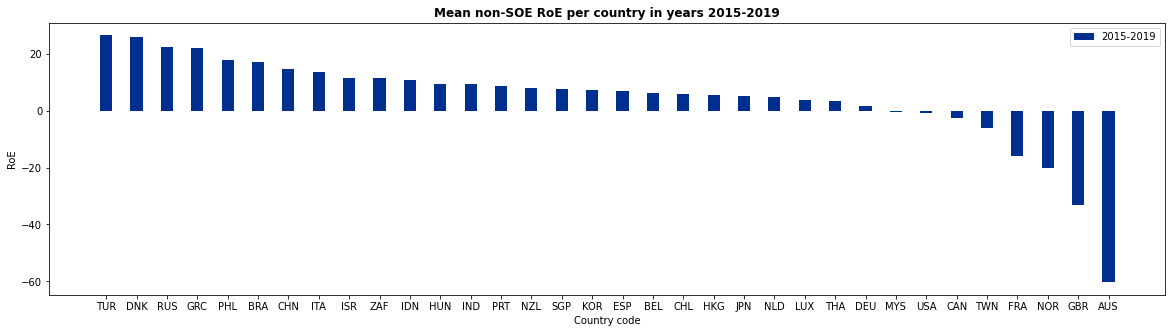

In [768]:
fig, ax = graph ( data_nonSOE["ROE", "Mean"], "Country code", "RoE", "Mean non-SOE RoE per country in years 2015-2019", size = (20, 5) )
fig.savefig ( "mean_nonsoe_roe_per_country.png", dpi = 300 )

## Total assets per year

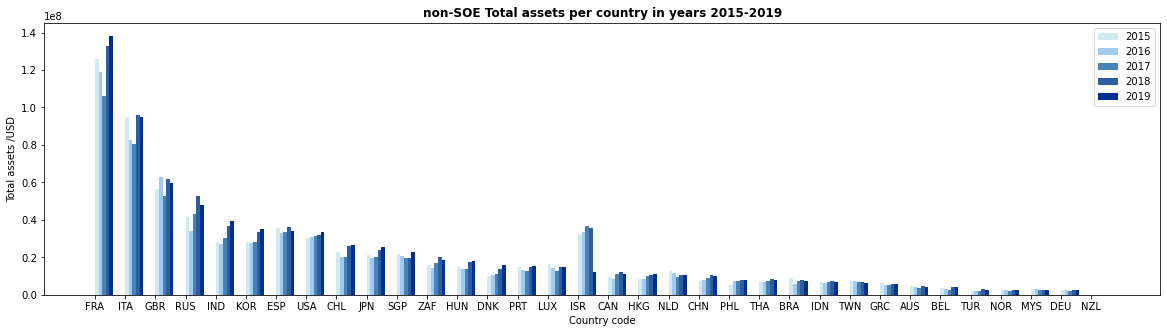

In [769]:
fig, ax = graph ( data_nonSOE["TA"], "Country code", "Total assets /USD", "non-SOE Total assets per country in years 2015-2019", size = (20, 5 ) )
fig.savefig ( "nonsoe_ta_per_country_per_year.png", dpi = 300 )

## Total assets mean

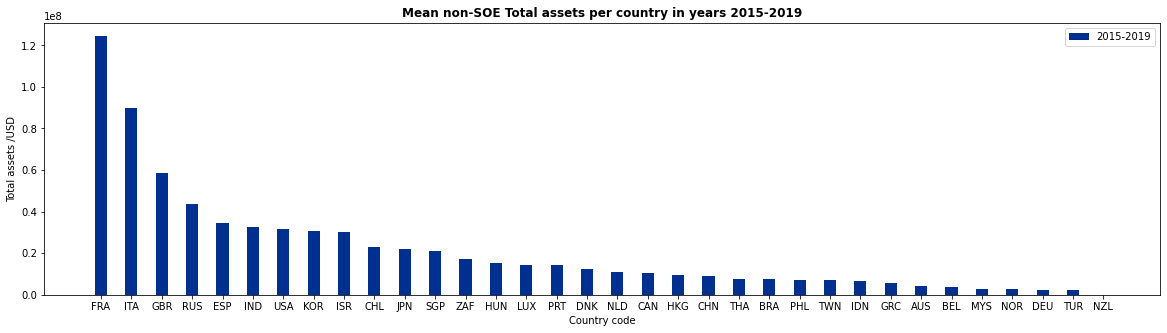

In [770]:
fig, ax = graph ( data_nonSOE["TA", "Mean"], "Country code", "Total assets /USD", "Mean non-SOE Total assets per country in years 2015-2019", size = (20, 5) )
fig.savefig ( "mean_nonsoe_ta_per_country.png", dpi = 300 )

## Total debt per year

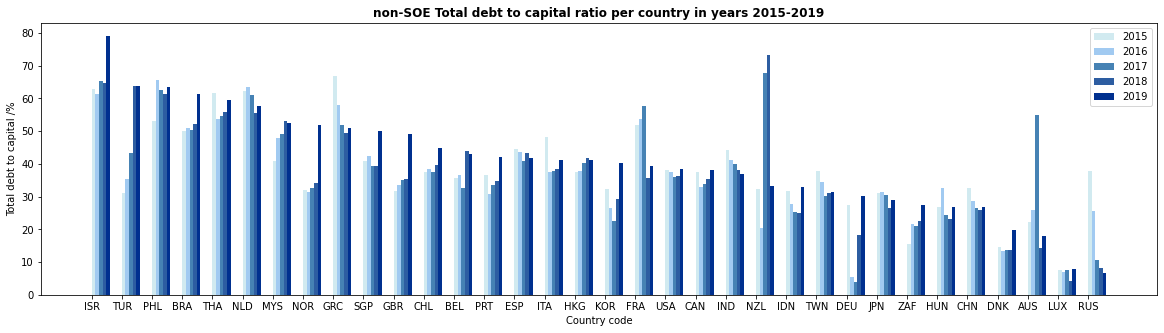

In [771]:
fig, ax = graph ( data_nonSOE["TD"], "Country code", "Total debt to capital /%", "non-SOE Total debt to capital ratio per country in years 2015-2019", size = (20, 5 ) )
fig.savefig ( "nonsoe_td_per_country_per_year.png", dpi = 300 )

## Total debt mean

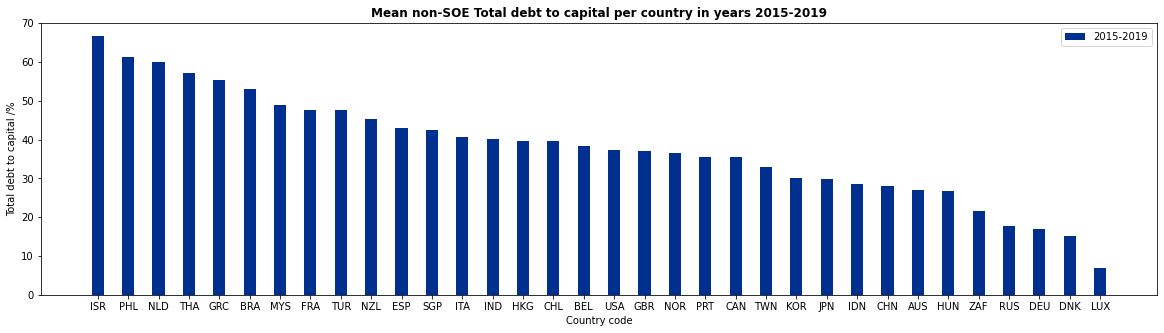

In [772]:
fig, ax = graph ( data_nonSOE["TD", "Mean"], "Country code", "Total debt to capital /%", "Mean non-SOE Total debt to capital per country in years 2015-2019", size = (20, 5) )
fig.savefig ( "mean_nonsoe_td_per_country.png", dpi = 300 )

# SOE

# ESG per year

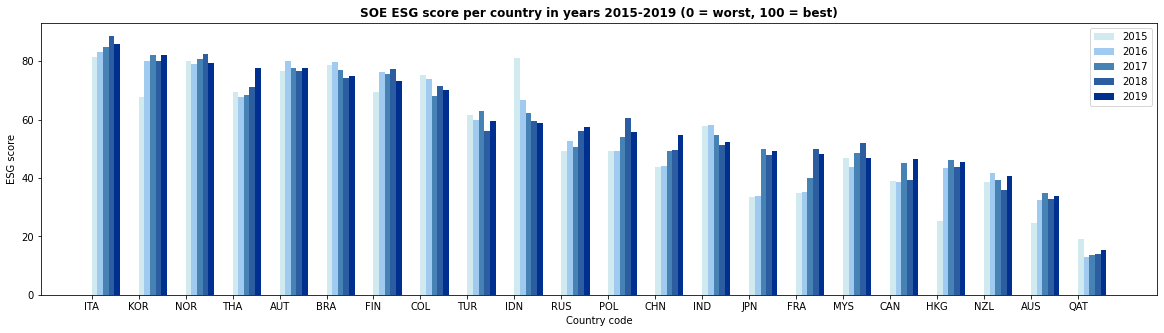

In [773]:
fig, ax = graph ( data_SOE["ESG"], "Country code", "ESG score", "SOE ESG score per country in years 2015-2019 (0 = worst, 100 = best)", size = (20, 5 ) )
fig.savefig ( "soe_esg_per_country_per_year.png", dpi = 300 )

## ESG mean

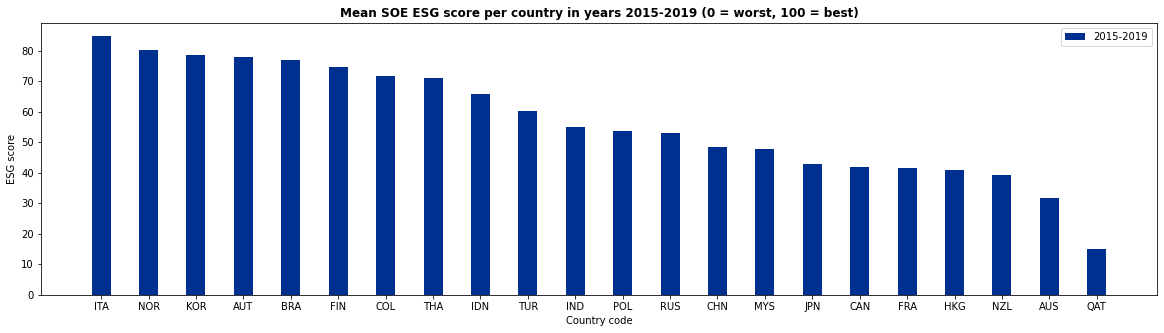

In [774]:
fig, ax = graph ( data_SOE["ESG", "Mean"], "Country code", "ESG score", "Mean SOE ESG score per country in years 2015-2019 (0 = worst, 100 = best)", size = (20, 5) )
fig.savefig ( "mean_soe_esg_per_country.png", dpi = 300 )

## ESG mean vs corruption

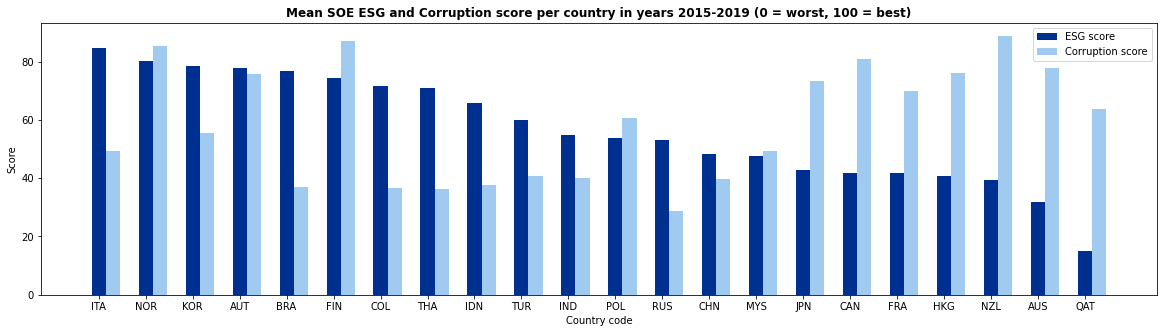

In [775]:
fig, ax = graph_vs ( data_SOE, [ ("ESG","Mean"), ("Corruption", "Mean") ], ["ESG score", "Corruption score"], "Country code", "Score", "Mean SOE ESG and Corruption score per country in years 2015-2019 (0 = worst, 100 = best)", colors = [ colors [ 4 ], colors [ 1 ] ] , size = (20, 5) )
fig.savefig ( "mean_soe_esg_vs_corr_per_country.png", dpi = 300 )


## RoE per year

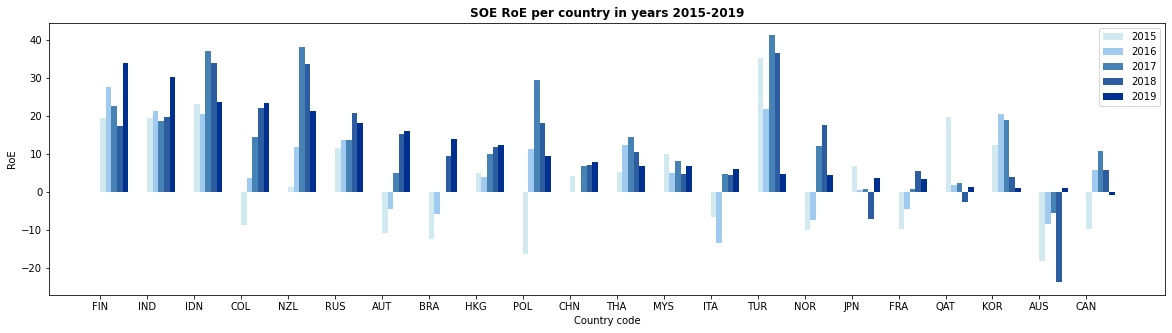

In [776]:
fig, ax = graph ( data_SOE["ROE"], "Country code", "RoE", "SOE RoE per country in years 2015-2019", size = (20, 5 ) )
fig.savefig ( "soe_roe_per_country_per_year.png", dpi = 300 )

## RoE mean

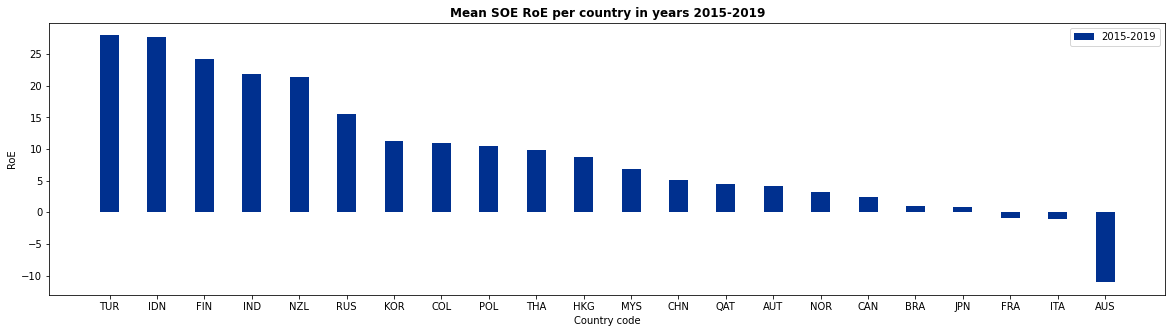

In [777]:
fig, ax = graph ( data_SOE["ROE", "Mean"], "Country code", "RoE", "Mean SOE RoE per country in years 2015-2019", size = (20, 5) )
fig.savefig ( "mean_soe_roe_per_country.png", dpi = 300 )

## Total assets per year

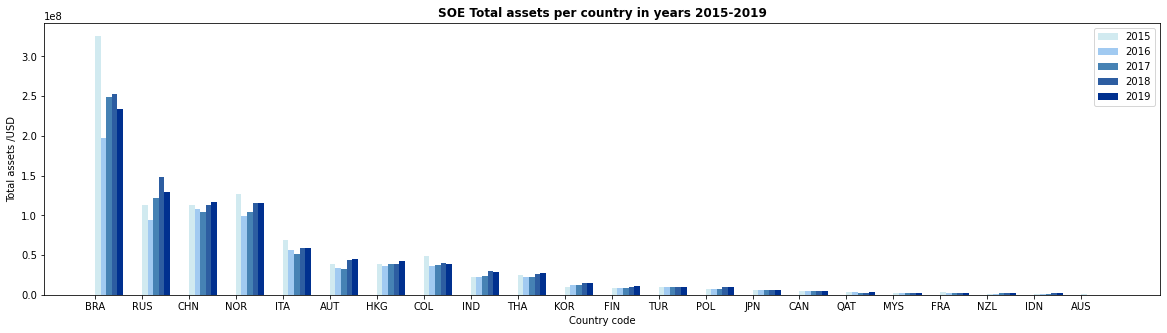

In [778]:
fig, ax = graph ( data_SOE["TA"], "Country code", "Total assets /USD", "SOE Total assets per country in years 2015-2019", size = (20, 5 ) )
fig.savefig ( "soe_ta_per_country_per_year.png", dpi = 300 )

## Total assets mean

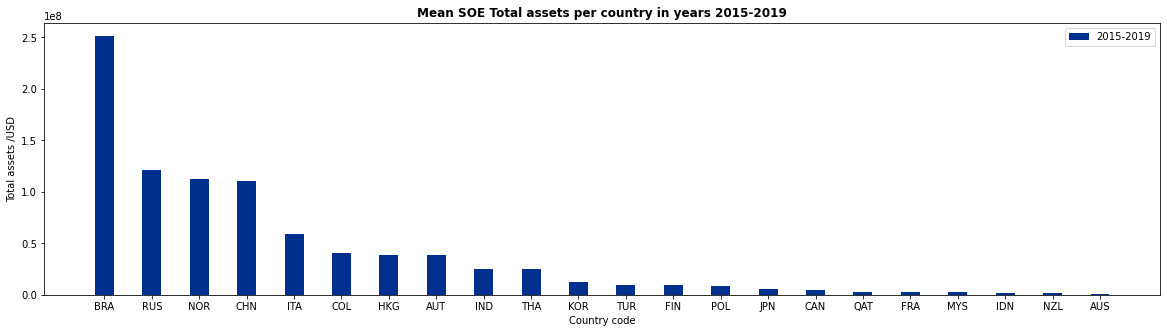

In [779]:
fig, ax = graph ( data_SOE["TA", "Mean"], "Country code", "Total assets /USD", "Mean SOE Total assets per country in years 2015-2019", size = (20, 5) )
fig.savefig ( "mean_soe_ta_per_country.png", dpi = 300 )

## Total debt to per year

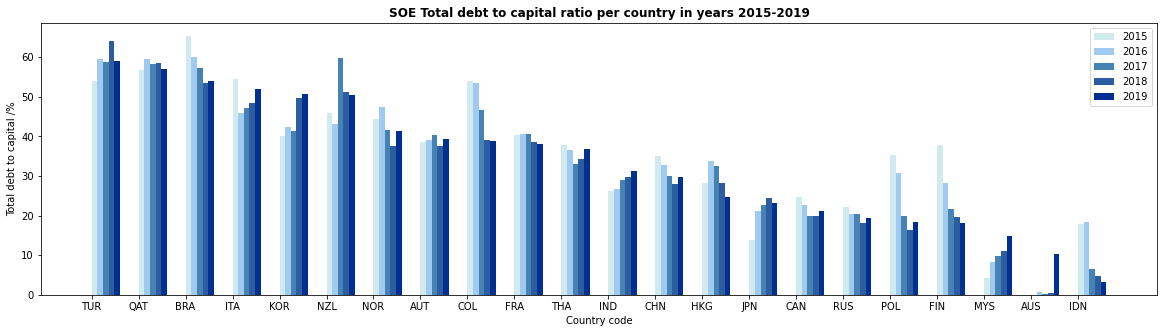

In [780]:
fig, ax = graph ( data_SOE["TD"], "Country code", "Total debt to capital /%", "SOE Total debt to capital ratio per country in years 2015-2019", size = (20, 5 ) )
fig.savefig ( "soe_td_per_country_per_year.png", dpi = 300 )

## Total debt mean

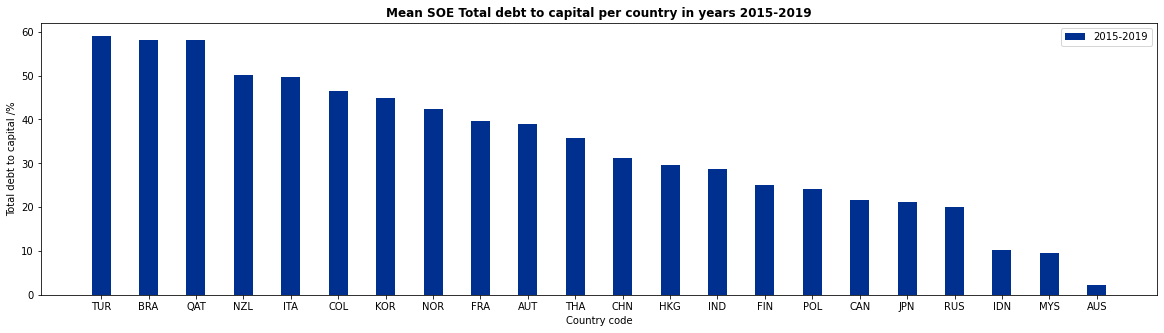

In [781]:
fig, ax = graph ( data_SOE["TD", "Mean"], "Country code", "Total debt to capital /%", "Mean SOE Total debt to capital per country in years 2015-2019", size = (20, 5) )
fig.savefig ( "mean_soe_td_per_country.png", dpi = 300 )

# Combined

## ESG vs GDP

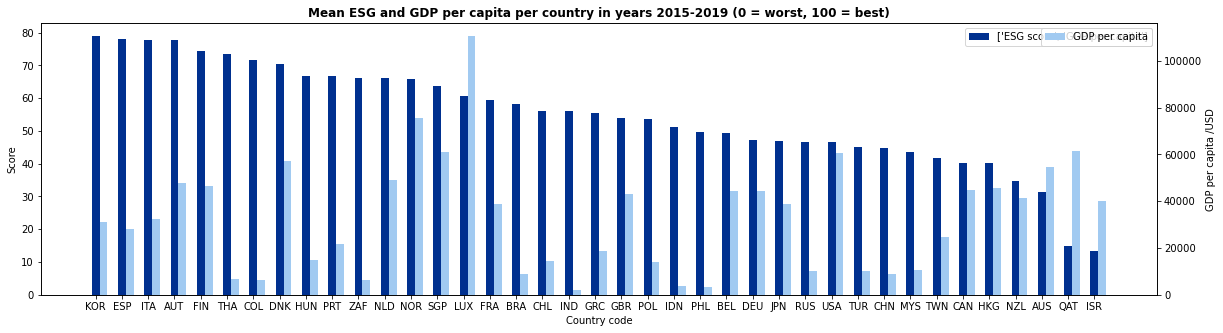

In [45]:
fig, ax = graph_vs ( data, [ ("ESG","Mean"), ("GDP", "Mean") ], ["ESG score", "GDP per capita"], "Country code", "Score", "Mean ESG and GDP per capita per country in years 2015-2019 (0 = worst, 100 = best)", colors = [ colors [ 4 ], colors [ 1 ] ] , size = (20, 5), separate = True, ylabel2 = "GDP per capita /USD" )
#fig.savefig ( "mean_combined_esg_vs_gdp_per_country.png", dpi = 300 )

In [ ]:
x = pd.DataFrame ( [ data_nonSOE["ESG"].mean(), data_SOE["ESG"].mean() ] ).transpose().sort_values ( by = "2015", axis = 1 )
x.columns = [ "non-SOE", "SOE" ]
x.drop ( "Mean", inplace = True )


fig, ax = graph_vs ( x, [ ("non-SOE"), ("SOE") ], ["ESG score", "GDP per capita"], "Country code", "ESG Score", "Mean SOE and non-SOE ESG in years 2015-2019 (0 = worst, 100 = best)", colors = [ colors [ 4 ], colors [ 1 ] ] , size = (10, 10), sort = False )
fig.savefig ( "mean_esg_soe_vs_nonsoe.png", dpi = 300 )

In [44]:
correl = pd.DataFrame ( np.zeros( ( 9, 9 ) ) )
more_cat = [ "ESG", "ROE", "TA", "TD", "MC", "MtBV", "Corruption", "GDP" ]
more_cat.append ( "State owned" )

raw_nonSOE = pd.DataFrame ( pd.read_csv( "Data/nonSOE.csv", delimiter = ";" ) ).dropna()
raw_nonSOE.set_index ( "Country Code", inplace = True )
raw_nonSOE = raw_nonSOE.join ( corruption )
raw_nonSOE = raw_nonSOE.join ( gdp )

raw_SOE = pd.DataFrame ( pd.read_csv( "Data/SOE.csv", delimiter = ";" ) ).dropna()
raw_SOE.set_index ( "Country Code", inplace = True )
raw_SOE = raw_SOE.join ( corruption )
raw_SOE = raw_SOE.join ( gdp )

correl.columns = more_cat
correl.index = more_cat
dt = pd.concat( [ raw_SOE, raw_nonSOE ] )
#dt = pd.concat( [ data_SOE, data_nonSOE ] ).dropna()

for cat1 in more_cat:
    for cat2 in more_cat:
        c1 = "" if cat1 == "State owned" else " 2019"
        c2 = "" if cat2 == "State owned" else " 2019"
        pearson = [0] #stats.pearsonr ( dt [ cat1 + c1 ], dt [ cat2 + c2 ] )
        correl.loc[ cat1][ cat2 ] = pearson[0]

correl = correl.style.apply(lambda x: ["background: red" if v < -0.8 or v > 0.8 else "" for v in x], axis = 0)
correl

,ESG,ROE,TA,TD,MC,MtBV,Corruption,GDP,State owned
ESG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ROE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MtBV,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Corruption,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GDP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
State owned,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [1136]:
correl2.to_csv("correlation2 - pearson.csv", sep = ";")

In [1086]:
results = pd.DataFrame  ( np.zeros( ( 2, 8 ) ) )
results.columns = categories
results.index = [ "non-SOE", "SOE" ]

for cat in categories:
    results [ cat ][ "non-SOE" ] = data_nonSOE [ cat, "2019" ].mean()
    results [ cat ][ "SOE" ] = data_SOE [ cat, "2019" ].mean()

results.to_csv("mean_values_per_ownership.csv", sep = ";")

In [35]:
raw_nonSOE = pd.DataFrame ( pd.read_csv( "Data/nonSOE.csv", delimiter = ";" ) )

raw_SOE = pd.DataFrame ( pd.read_csv( "Data/SOE.csv", delimiter = ";" ) )

raw = pd.concat ( [ pd.DataFrame ( pd.read_csv( "Data/nonSOE.csv", delimiter = ";" ) ), pd.DataFrame ( pd.read_csv( "Data/SOE.csv", delimiter = ";" ) ) ] )


In [1092]:
less_cat = [ "ESG", "ROE", "TA", "TD", "MC", "MtBV", "ISIN" ]

avg_companies = pd.DataFrame  ( np.zeros( ( 2, 7 ) ) )
avg_companies.columns = less_cat
avg_companies.index = [ "non-SOE", "SOE" ]
avg_companies["ISIN"] = avg_companies["ISIN"].astype ( str )

for cat in less_cat:
    year = " 2019" if not cat == "ISIN" else ""
    avg_companies [ cat ][ "non-SOE" ] = raw_nonSOE [ cat + year ][144]
    avg_companies [ cat ][ "SOE" ] = raw_SOE [ cat + year ][40]

avg_companies.to_csv("average_company_per_ownership.csv", sep = ";")

/var/folders/n9/39n7g59101v56skn325f61nm0000gn/T/ipykernel_90701/511293722.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_companies [ cat ][ "non-SOE" ] = raw_nonSOE [ cat + year ][144]
/var/folders/n9/39n7g59101v56skn325f61nm0000gn/T/ipykernel_90701/511293722.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_companies [ cat ][ "SOE" ] = raw_SOE [ cat + year ][40]


In [47]:
raw = pd.concat ( [ raw_SOE, raw_nonSOE ] )

vec = "Relative assets"
#c = raw [ raw [ vec ] > raw [ vec ].quantile ( 0.05 ) ]
#d = c [ c [ vec ] < c [ vec ].quantile ( 0.95 ) ]
#a = d [ "ESG" ]
#b = d [ vec ]
#d = raw
#a = d [ "ESG" ]
#b = d [ "Relative assets" ]

fig, ax = plt.subplots( figsize = ( 7.5, 7.5 ) )
ax.scatter ( a, b, color = colors [ 4 ] )
ax.scatter ( a, d["Market to book value"], color = colors [ 1 ] )
#ax.plot ( [a.min(), a.max()], [b.min(), b.max() ], color = colors [ 1 ], linewidth = 5 )
ax.set_title ( "ESG score vs Market to book value", weight = "bold" )
ax.set_xlabel ( "ESG score" )
ax.set_ylabel ( "Market to book value" )
#ax.set_xlim ( [ 0, 100 ] )
#ax.set_ylim ( [ 0, 100 ] )
fig.savefig ( "esg_vs_mtbv", dpi = 300 )


KeyError: 'ESG'

In [1539]:
import scipy.stats.mstats as ms

raw_SOE = pd.DataFrame ( pd.read_csv( "Data/SOE.csv", delimiter = ";" ) )
raw_nonSOE = pd.DataFrame ( pd.read_csv( "Data/nonSOE.csv", delimiter = ";" ) )

a = pd.concat ( [ raw_nonSOE, raw_SOE ] ).copy()
a.set_index ( "Country Code", inplace = True )
a = a.join ( corruption )
a = a.join ( gdp )
a.drop ("ISIN", axis = 1, inplace = True )
a.columns = pd.MultiIndex.from_product( [ categories, years  ] ).insert ( -10, "State owned" )
#b = a["GDP"].stack()
#pd.DataFrame(b).describe()
#a["GDP", "2019"].describe()
c = ms.winsorize( a["TA"].stack(), limits = [0.05, 0.05] )/1000000
#c = a["ESG"].stack()
pd.DataFrame ( c ).describe()

,0
count,1448.000000
mean,18.310619
std,28.584731
min,0.180589
25%,1.907517
50%,5.725920
75%,18.651654
max,109.330000


In [1520]:
b, i, c = [], 0, []
for cat in categories:
    b.append ( [] )
    c.append ( cat )
    for y in years:
        b [ i ] = ms.winsorize ( a [ cat, y ], limits = [0.05, 0.05] ).data
    i += 1
#b.index = a.index
#b.groupby ( "Country Code" ).mean()
d = pd.DataFrame ( b ).transpose()
d.columns = c
d

,ESG,ROE,TA,TD,MC,MtBV,Corruption,GDP
0,16.96,4.03,1681034.0,49.94,74577.0,0.25,79.0,54875.285960
1,18.20,-44.47,191419.0,16.90,53583.0,1.42,79.0,54875.285960
2,72.81,11.54,5751146.0,35.25,5968168.0,2.04,79.0,54875.285960
3,61.69,9.71,17855465.0,36.62,9038819.0,0.87,79.0,54875.285960
4,41.47,9.12,15677848.0,36.55,11995912.0,1.04,79.0,54875.285960
...,...,...,...,...,...,...,...,...
286,90.86,44.46,136122649.0,82.94,73905427.0,0.24,76.0,65279.529030
287,26.98,4.98,4069676.0,44.57,2096073.0,0.99,76.0,65279.529030
288,85.67,6.46,73300000.0,49.64,47948696.0,1.01,76.0,65279.529030
289,73.95,1.94,32075410.0,38.04,15362691.0,1.21,44.0,6624.761865


In [1521]:
correl = pd.DataFrame ( np.zeros( ( 8, 8 ) ) )
correl.columns = c
correl.index = c
d = d.dropna()
for cat1 in c:
    for cat2 in c:
        pearson = stats.pearsonr ( d [ cat1 ], d [ cat2 ] )
        correl.loc[ cat1 ][ cat2 ] = pearson[0]
correl = correl.style.apply(lambda x: ["background: red" if v < -0.8 or v > 0.8 else "" for v in x], axis = 0)
correl

,ESG,ROE,TA,TD,MC,MtBV,Corruption,GDP
ESG,1.000000,0.173737,0.444760,0.170556,0.443149,0.081491,-0.176627,-0.168482
ROE,0.173737,1.000000,0.144786,-0.011749,0.215806,0.069221,-0.211147,-0.216390
TA,0.444760,0.144786,1.000000,0.067126,0.935430,-0.055844,-0.210324,-0.112478
TD,0.170556,-0.011749,0.067126,1.000000,0.004254,0.080410,0.008127,0.036734
MC,0.443149,0.215806,0.935430,0.004254,1.000000,0.006355,-0.193940,-0.098651
MtBV,0.081491,0.069221,-0.055844,0.080410,0.006355,1.000000,-0.082834,-0.013910
Corruption,-0.176627,-0.211147,-0.210324,0.008127,-0.193940,-0.082834,1.000000,0.850302
GDP,-0.168482,-0.216390,-0.112478,0.036734,-0.098651,-0.013910,0.850302,1.000000


In [19]:
petro = pd.DataFrame ( [ 80.69, 83.12, 80.16, 80.48, 79.45, 78.63, 79.72, 76.92, 74.42, 74.94 ] )

In [34]:
petro.columns = [ "ESG" ]
petro.index = [ 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019 ]

Text(0.5, 1.0, 'ESG score of Petróleo Brasileiro during 2010–2019')

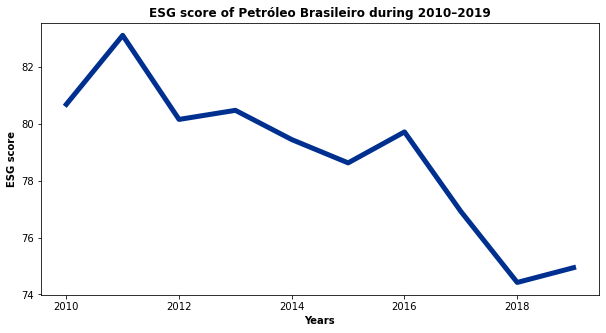

In [38]:
width = 5
x = np.arange ( len ( petro.index ) )
fig, ax = plt.subplots ( figsize = ( 10, 5 ) )
ax.plot ( petro.index, petro [ "ESG" ], linewidth = width, color = colors [ 4 ] )
#ax.plot ( [ 2014, 2014 ], [ 74, 83 ], linewidth = 1, color = "black" )
#ax.set_xticks ( x * 5, petro.index )
#ax.set_ylim ( 60 )
ax.set_ylabel ( "ESG score", weight = "bold" )
ax.set_xlabel ( "Years", weight = "bold" )
ax.set_title ( "ESG score of Petróleo Brasileiro during 2010–2019", weight = "bold" )

In [32]:
fig.savefig ( "petrobras", dpi = 300 )

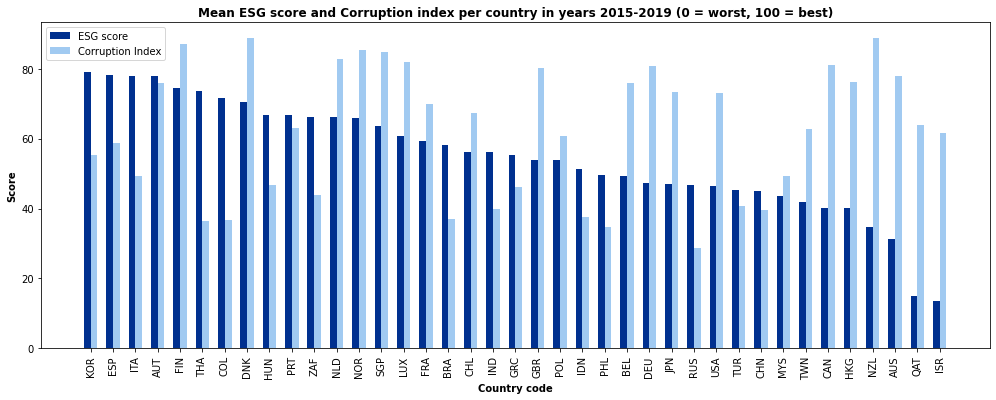

In [88]:
fig, ax = graph_vs ( data, [ ("ESG","Mean"), ("Corruption", "Mean") ], ["ESG score", "Corruption Index"], "Country code", "Score", "Mean ESG score and Corruption index per country in years 2015-2019 (0 = worst, 100 = best)", colors = [ colors [ 4 ], colors [ 1 ] ] , size = (17, 6) )
fig.savefig ( "esg_vs_corruption", dpi = 300 )

In [104]:
abc = pd.DataFrame ( [ data_nonSOE["ESG"].mean(), data_SOE["ESG"].mean() ] ).transpose()
abc.columns = [ "non-SOEs", "SOEs" ]
abc.drop ( "Mean", inplace = True )

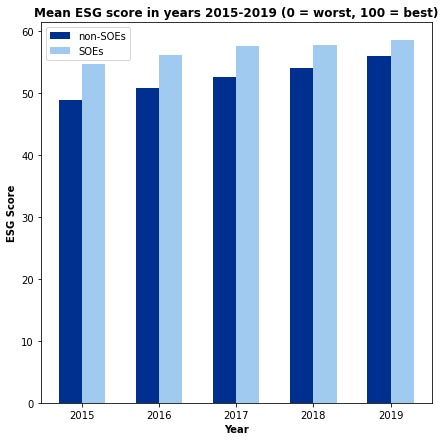

In [110]:
fig, ax = graph_vs ( abc, [ "non-SOEs", "SOEs" ], ["non-SOEs", "SOEs"], "Year", "ESG Score", "Mean ESG score in years 2015-2019 (0 = worst, 100 = best)", colors = [ colors [ 4 ], colors [ 1 ] ] , size = (7, 7) )
fig.savefig ( "esg_per_ownership", dpi = 300 )

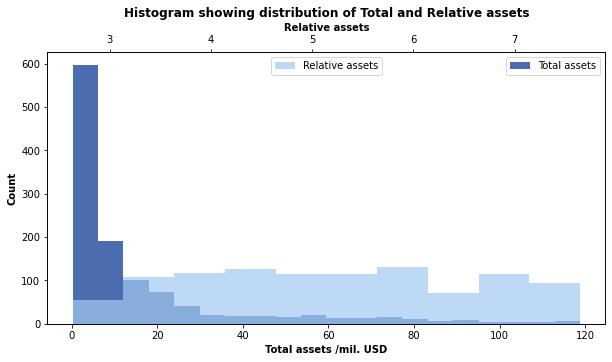

In [128]:
raw = pd.DataFrame ( pd.read_csv( "Data/final.csv", delimiter = "," ) ).dropna()

c = raw [ raw [ "Relative assets" ] > raw [ "Relative assets" ].quantile ( 0.1 ) ]
d = c [ c [ "Relative assets" ] < c [ "Relative assets" ].quantile ( 0.9 ) ]

e = raw [ raw [ "Total Assets" ] > raw [ "Total Assets" ].quantile ( 0.05 ) ]
f = e [ e [ "Total Assets" ] < e [ "Total Assets" ].quantile ( 0.95 ) ]

fig, ax = plt.subplots ( figsize = ( 10, 5 ) )
ax.hist ( f["Total Assets"]/1000000, bins = 20, alpha = 0.7, color = colors [ 4 ], label = "Total assets" )
ax.set_xlabel ( "Total assets /mil. USD", weight = "bold" )
ax.set_ylabel ( "Count", weight = "bold" )
ax.set_title ( "Histogram showing distribution of Total and Relative assets", weight = "bold" )
ax2 = ax.twiny ()
ax2.hist ( d["Relative assets"] , alpha = 0.7, bins = 10, color = colors [ 1 ], label = "Relative assets" )
ax2.set_xlabel ( "Relative assets", weight = "bold" )
ax.legend()
ax2.legend( loc = 9 )
fig.savefig ( "histo", dpi = 300 )

In [346]:
raw.columns

Index(['Unnamed: 0', 'Country Code', 'Year', 'Name', 'ESG', 'Return on equity',
       'Total Assets', 'Total Debt', 'Market to book', 'State owned',
       'Corruption', 'GDP', 'Total debt to capital', 'RoE', 'Total assets',
       'Market to book value', 'Relative assets'],
      dtype='object')

In [392]:
c= [ 13.1, -0.321, -0.021, 9.19, -0.052, 0.815, -0.173 ]
v = [ "State owned", "Corruption", "RoE", "Relative assets", "Total debt to capital", "Market to book value" ]
raw = raw.dropna()
raw [ "Model" ] = c[0]*raw[v[0]] + c[1]*raw[v[1]] + c[2]*raw[v[2]] + c[3]*raw[v[3]] + c[4]*raw[v[4]] + c[5]*raw[v[5]] + c[6]*raw[v[0]]*raw[v[1]]

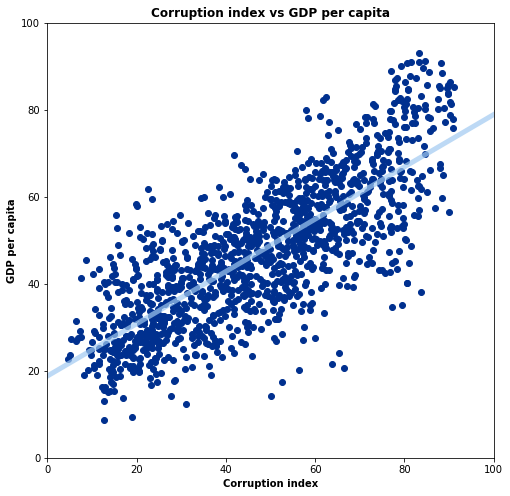

In [541]:
fit = pd.DataFrame ( pd.read_csv( "Data/fitted.csv", delimiter = "," ) )
c = raw [ raw [ "GDP" ] > raw [ "GDP" ].quantile ( 0.05 ) ]
d = c [ c [ "GDP" ] < c [ "GDP" ].quantile ( 0.95 ) ]

#a = d [ "Corruption" ]
#b = d [ "GDP" ]
a = fit [ "esg" ]
b = fit [ "fitted" ]

fig, ax = plt.subplots( figsize = ( 8, 8 ) )
ax.plot ( [0, 100], [x.intercept, 100 * x.slope + x.intercept ], color = colors [ 1 ], linewidth = 5, alpha = 0.7 )
ax.scatter ( a, b, color = colors [ 4 ] )
ax.set_title ( "Corruption index vs GDP per capita", weight = "bold" )
ax.set_xlabel ( "Corruption index", weight = "bold" )
ax.set_ylabel ( "GDP per capita", weight = "bold" )
ax.set_xlim ( [ 0, 100 ] )
ax.set_ylim ( [ 0, 100 ] )

fig.savefig ( "gdp_vs_corruption", dpi = 300 )

In [535]:
import scipy.stats as st
x = None
x = st.linregress ( fit [ "esg" ], fit [ "fitted"] )
pd.DataFrame ( x )

,0
0,6.014109e-01
1,1.879628e+01
2,7.755069e-01
3,6.273990e-264
4,1.352735e-02


In [63]:
raw.columns

Index(['Unnamed: 0', 'Country Code', 'Year', 'Name', 'ESG', 'Return on equity',
       'Total Assets', 'Total Debt', 'Market to book', 'State owned',
       'Corruption', 'GDP', 'Total debt to capital', 'RoE', 'Total assets',
       'Market to book value', 'Relative assets'],
      dtype='object')

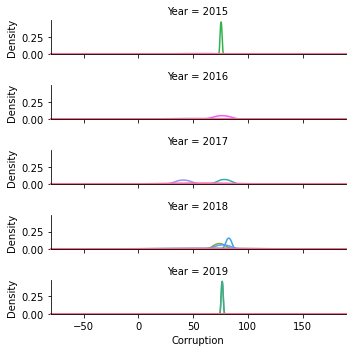

In [12]:
import seaborn as sns
year_dict = {1: "2015", 2: "2016", 3: "2017", 4: "2018", 5: "2019" }
pal = sns.color_palette(palette='coolwarm', n_colors = 5)
g = sns.FacetGrid ( raw, row = "Year", hue="ESG", aspect = 5, height = 1 )

g.map ( sns.kdeplot, "Corruption" , warn_singular = False )

#g.map ( sns.kdeplot, "ESG", 
#      bw_adjust = 1, clip_on = False, 
#      color = "w", lw = 2, warn_singular = False )

g.map( plt.axhline, y = 0,
      lw = 2, clip_on = False)

#for i, ax in enumerate( g.axes.flat ):
#    ax.text(-15, 0.02, year_dict[i+1],
#            fontweight = 'bold', fontsize = 15,
#            color = ax.lines[-1].get_color())
    
#g.fig.subplots_adjust(hspace=-0.3)
#g.set_titles("")
#g.set(yticks=[])
#g.despine(bottom=True, left=True)

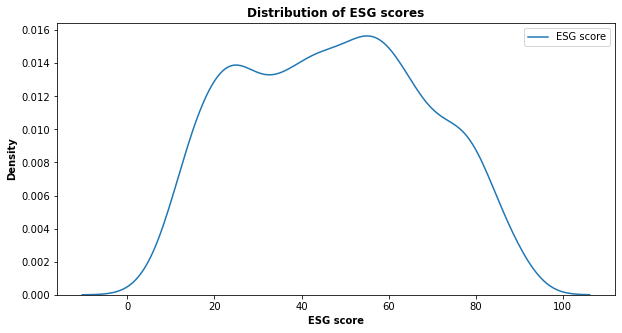

In [126]:
plt.figure(figsize=(10,5))
abc = raw [[ "ESG" ]]
labels = [ "ESG score" ]
fig = sns.kdeplot ( data = abc, legend = False )
fig.set_xlabel ( "ESG score", weight = "bold" )
fig.set_ylabel ( "Density", weight = "bold" )
fig.set_title ( "Distribution of ESG scores", weight = "bold" )
plt.legend ( labels )
plt.savefig ( "distribution", dpi = 300 )

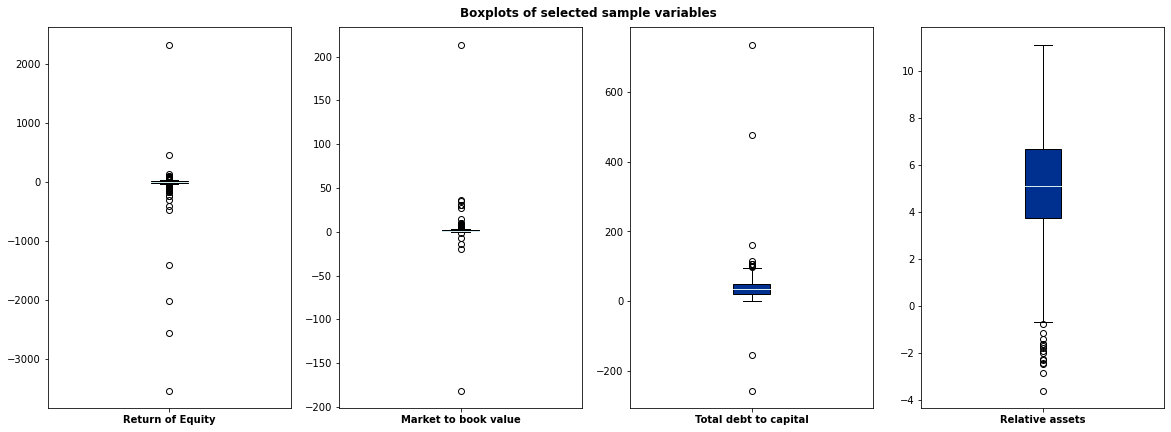

In [10]:
raw2 = pd.DataFrame ( pd.read_csv( "Data/fina23l.csv", delimiter = "," ) ).dropna()
raw2 [ "RA"] = np.log ( raw2 [ "Total Assets" ] / raw2 [ "GDP" ] )
var = [ "Return on equity", "Market to book", "Total Debt", "RA" ]
labels = [ "Return of Equity", "Market to book value", "Total debt to capital", "Relative assets" ]
#var = [ "ESG", "Corruption", "Return on equity", "Market to book", "Relative assets", "Total Debt" ]
#labels = [ "ESG score", "Corruption index", "Return of Equity", "Market to book value", "Relative assets", "Total debt to capital" ]
fig, ax = plt.subplots ( ncols = 4, figsize = ( 20, 7 ) )
k = 0
for i in var:
    box = ax[ k ].boxplot ( raw2 [ i ], labels = [ labels [ k ] ], patch_artist = True )
    box["boxes"][0].set_facecolor ( colors [ 4 ] )
    box["medians"][0].set_color ( colors [ 0 ] )
    ax[k].set_xticklabels( [ labels [ k ] ], weight='bold' )
    k += 1
fig.suptitle ( "Boxplots of selected sample variables", y = 0.92, weight = "bold" )
fig.savefig ( "boxplots2", dpi = 300 )

In [134]:
raw [ "Total debt to capital" ] = ms.winsorize ( raw [ "Total debt to capital" ], limits = [0.05, 0.05] )

Index(['Unnamed: 0', 'Country Code', 'Year', 'Name', 'ESG', 'Return on equity',
       'Total Assets', 'Total Debt', 'Market to book', 'State owned',
       'Corruption', 'GDP'],
      dtype='object')

In [164]:
raw2

,Unnamed: 0,Country Code,Year,Name,ESG,Return on equity,Total Assets,Total Debt,Market to book,State owned,Corruption,GDP,Relative assets
0,1,AUS,2015,AMPOL - ESG Score,44.20,19.69,3933485,19.96,3.33,0,79,56707.022077,69.365043
1,2,AUS,2015,APA GROUP - ESG Score,27.93,16.28,11991243,67.98,1.89,0,79,56707.022077,211.459579
2,3,AUS,2015,ENERGY WORLD - ESG Score,5.06,4.28,1614476,41.44,0.65,0,79,56707.022077,28.470478
3,4,AUS,2015,WHITE ENERGY - ESG Score,28.51,-22.84,139462,31.92,0.55,0,79,56707.022077,2.459343
4,5,AUS,2015,BEACH ENERGY - ESG Score,37.81,-31.88,1502825,9.88,1.00,0,79,56707.022077,26.501568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1308,ZAF,2017,SASOL - ESG Score,70.44,9.73,28947434,27.92,1.23,0,43,6690.939847,4326.362912
1308,1309,ZAF,2018,EXXARO RESOURCES - ESG Score,64.33,17.16,5212279,12.63,1.39,0,43,7005.095413,744.069665
1309,1310,ZAF,2018,SASOL - ESG Score,67.58,4.02,35148552,32.78,1.25,0,43,7005.095413,5017.569345
1310,1311,ZAF,2019,SASOL - ESG Score,73.95,1.94,32075410,38.04,1.21,0,44,6624.761865,4841.745357
